In [1]:
## %pip install plotly --quiet
## %pip install -U kaleido --quiet

In [2]:
import pandas as pd

import warnings
warnings.simplefilter('ignore')

import plotly.express as px
import plotly.io as pio
from plotly.subplots import make_subplots
import plotly.graph_objects as go

pio.templates.default = "ggplot2"
px.defaults.width = 600
px.defaults.height = 400
pio.renderers.default = 'png'

# 13C-edited NOESY

In [3]:
df_C_all = pd.read_csv('data/out/noe_to_HN_rel_int_13CALI.csv', index_col=0)
df_C_all.dropna(inplace=True)
df_C_all['rank'] = df_C_all['rank'].astype('int')
df_C_all['rank'] = df_C_all['rank'].astype('category')

In [4]:
rank_counts = df_C_all.groupby(['atom_type_pos', 'rank']).size().unstack(fill_value=0)
rank_counts.insert(3, "4+", rank_counts.iloc[:, 3:].sum(axis=1))
rank_counts = rank_counts.iloc[:, :4]
rank_counts.index.name = "Atom name"
rank_counts.columns = ["1st highest", "2nd highest", "3rd highest", "4th or lower"]

rank_counts.style.background_gradient(cmap='Greens')

,1st highest,2nd highest,3rd highest,4th or lower
Atom name,,,,
HD_far,14,4,2,4
HD_i,18,13,8,6
HD_i+1,2,1,2,2
HD_i-1,2,0,2,2
HE_far,6,3,2,0
HE_i,16,12,2,8
HZ_far,2,0,1,0
H_far,413,265,189,260
H_i,85,55,14,13


In [5]:
query_atoms=["H_i", "H_i-1", "H_i+1"]

_ = df_C_all.loc[df_C_all.atom_type_pos.isin(query_atoms)]
rank_counts = _.groupby(['atom_type_pos', 'rank']).size().unstack(fill_value=0)
rank_counts.insert(3, "4+", rank_counts.iloc[:, 3:].sum(axis=1))
rank_counts = rank_counts.iloc[:, :4]
rank_counts.index.name = "Atom name"
rank_counts.columns = ["1st highest", "2nd highest", "3rd highest", "4th or lower"]

rank_counts.style.background_gradient(cmap='Greens')

,1st highest,2nd highest,3rd highest,4th or lower
Atom name,,,,
H_i,85,55,14,13
H_i+1,84,38,27,17
H_i-1,34,25,34,60


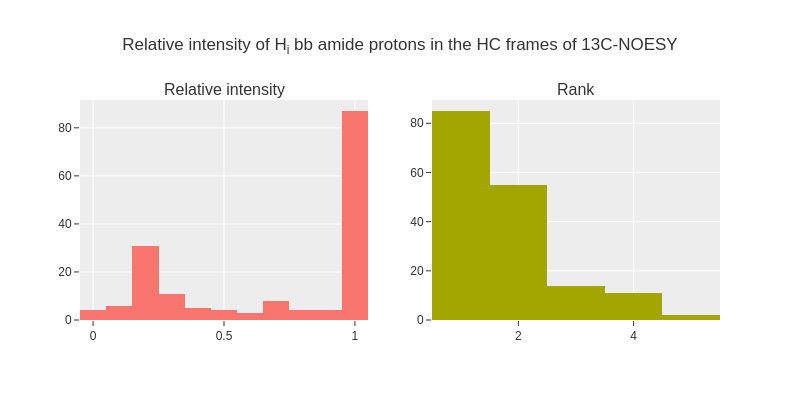

In [6]:
fig = make_subplots(rows=1, cols=2, 
                   subplot_titles=("Relative intensity","Rank"))

fig.add_trace(
    go.Histogram(x=df_C_all.query('atom_type_pos == "H_i"')['rel_height']),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(x=df_C_all.query('atom_type_pos == "H_i"')['rank']),
    row=1, col=2
)

fig.update_layout(height=400, width=800, showlegend=False, 
                  title_text="Relative intensity of H<sub>i</sub> bb amide protons in the HC frames of 13C-NOESY")
fig.show()

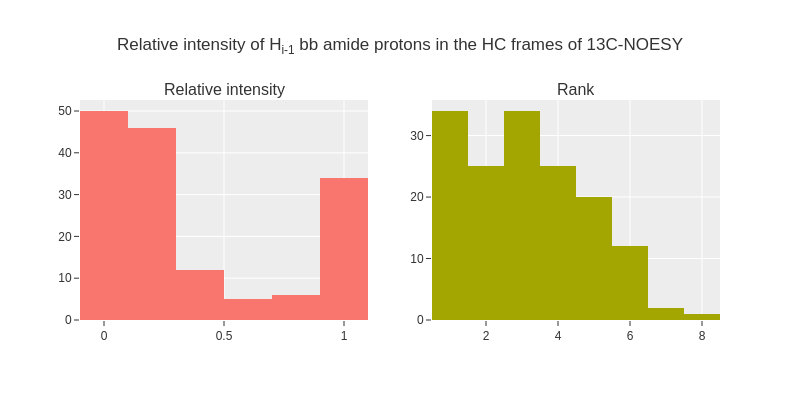

In [7]:
fig = make_subplots(rows=1, cols=2, 
                   subplot_titles=("Relative intensity","Rank"))

fig.add_trace(
    go.Histogram(x=df_C_all.query('atom_type_pos == "H_i-1"')['rel_height']),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(x=df_C_all.query('atom_type_pos == "H_i-1"')['rank']),
    row=1, col=2
)

fig.update_layout(height=400, width=800, showlegend=False, 
                  title_text="Relative intensity of H<sub>i-1</sub> bb amide protons in the HC frames of 13C-NOESY")
fig.show()

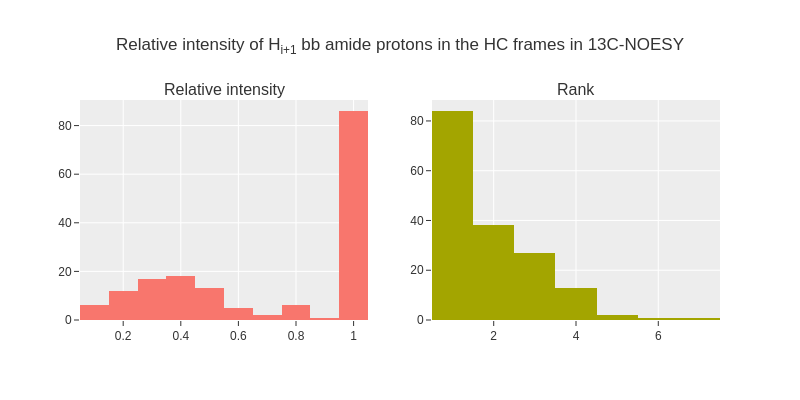

In [8]:
fig = make_subplots(rows=1, cols=2, 
                   subplot_titles=("Relative intensity","Rank"))

fig.add_trace(
    go.Histogram(x=df_C_all.query('atom_type_pos == "H_i+1"')['rel_height']),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(x=df_C_all.query('atom_type_pos == "H_i+1"')['rank']),
    row=1, col=2
)

fig.update_layout(height=400, width=800, showlegend=False, 
                  title_text="Relative intensity of H<sub>i+1</sub> bb amide protons in the HC frames in 13C-NOESY")
fig.show()

In [9]:
df_C_all

,pdb_id,res,noe,X,H,Hnoe,height,rel_height,noe_res,inter,resnum,noe_resnum,res_diff,atom_type,atom_type_pos,rank
14,2JT1,E3CA,S4H,56.802,4.408,8.650,466,1.000000,E3,True,3,4,-1,H,H_i+1,1
37,2JT1,S4CA,H,58.557,4.463,8.650,540,0.198968,S4,False,4,4,0,H,H_i,3
41,2JT1,S4CA,I5H,58.557,4.463,8.404,2714,1.000000,S4,True,4,5,-1,H,H_i+1,1
43,2JT1,S4CA,T7H,58.557,4.463,7.515,547,0.201548,S4,True,4,7,-3,H,H_far,2
55,2JT1,I5CA,H,62.662,3.902,8.404,701,0.776301,I5,False,5,5,0,H,H_i,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4986,2K57,V50CA,T8H,62.302,4.306,8.986,768,1.000000,V50,True,50,8,42,H,H_far,1
5093,2K57,K51CA,V6H,54.703,4.738,9.186,1133,1.000000,K51,True,51,6,45,H,H_far,1
5234,2K57,D52CA,T5H,54.865,4.531,8.235,829,0.923163,D52,True,52,5,47,H,H_far,2
5238,2K57,D52CA,V6H,54.865,4.531,9.186,898,1.000000,D52,True,52,6,46,H,H_far,1


## For Gly frames only

In [10]:
df_C_gly = pd.read_csv('data/out/gly_noe_to_HN_13CALI.csv', index_col=0)
df_C_gly.dropna(inplace=True)
df_C_gly['rank'] = df_C_gly['rank'].astype('int')
df_C_gly['rank'] = df_C_gly['rank'].astype('category')

In [11]:
rank_counts = df_C_gly.groupby(['atom_type_pos', 'rank']).size().unstack(fill_value=0)
rank_counts.insert(3, "4+", rank_counts.iloc[:, 3:].sum(axis=1))
rank_counts = rank_counts.iloc[:, :4]
rank_counts.index.name = "Atom name"
rank_counts.columns = ["1st highest", "2nd highest", "3rd highest", "4th or lower"]

rank_counts.style.background_gradient(cmap='Greens')

,1st highest,2nd highest,3rd highest,4th or lower
Atom name,,,,
H_far,30,21,12,23
H_i,8,6,0,0
H_i+1,8,5,1,0
H_i-1,6,2,3,8


In [12]:
query_atoms=["H_i", "H_i-1", "H_i+1"]

_ = df_C_gly.loc[df_C_gly.atom_type_pos.isin(query_atoms)]
rank_counts = _.groupby(['atom_type_pos', 'rank']).size().unstack(fill_value=0)
rank_counts.insert(3, "4+", rank_counts.iloc[:, 3:].sum(axis=1))
rank_counts = rank_counts.iloc[:, :4]
rank_counts.index.name = "Atom name"
rank_counts.columns = ["1st highest", "2nd highest", "3rd highest", "4th or lower"]

rank_counts.style.background_gradient(cmap='Greens')

,1st highest,2nd highest,3rd highest,4th or lower
Atom name,,,,
H_i,8,6,0,0
H_i+1,8,5,1,0
H_i-1,6,2,3,8


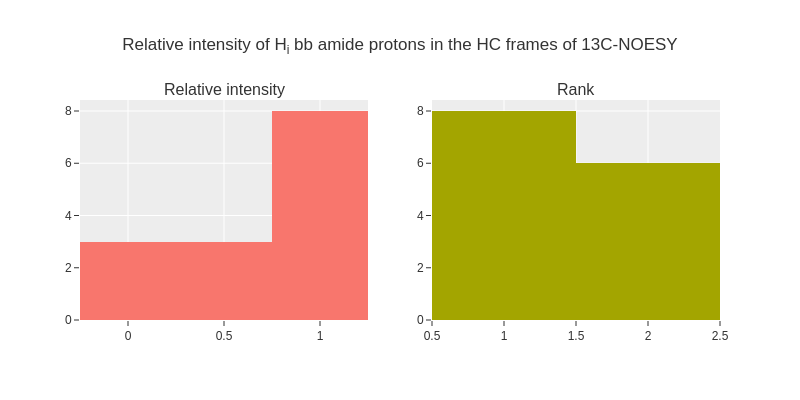

In [13]:
fig = make_subplots(rows=1, cols=2, 
                   subplot_titles=("Relative intensity","Rank"))

fig.add_trace(
    go.Histogram(x=df_C_gly.query('atom_type_pos == "H_i"')['rel_height']),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(x=df_C_gly.query('atom_type_pos == "H_i"')['rank']),
    row=1, col=2
)

fig.update_layout(height=400, width=800, showlegend=False, 
                  title_text="Relative intensity of H<sub>i</sub> bb amide protons in the HC frames of 13C-NOESY")
fig.show()

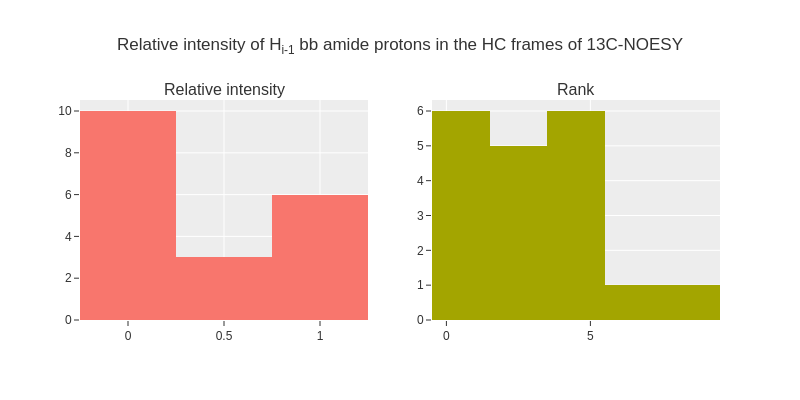

In [14]:
fig = make_subplots(rows=1, cols=2, 
                   subplot_titles=("Relative intensity","Rank"))

fig.add_trace(
    go.Histogram(x=df_C_gly.query('atom_type_pos == "H_i-1"')['rel_height']),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(x=df_C_gly.query('atom_type_pos == "H_i-1"')['rank']),
    row=1, col=2
)

fig.update_layout(height=400, width=800, showlegend=False, 
                  title_text="Relative intensity of H<sub>i-1</sub> bb amide protons in the HC frames of 13C-NOESY")
fig.show()

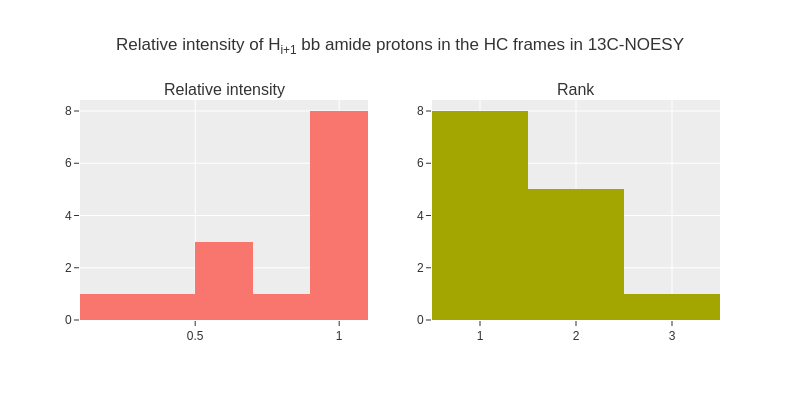

In [15]:
fig = make_subplots(rows=1, cols=2, 
                   subplot_titles=("Relative intensity","Rank"))

fig.add_trace(
    go.Histogram(x=df_C_gly.query('atom_type_pos == "H_i+1"')['rel_height']),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(x=df_C_gly.query('atom_type_pos == "H_i+1"')['rank']),
    row=1, col=2
)

fig.update_layout(height=400, width=800, showlegend=False, 
                  title_text="Relative intensity of H<sub>i+1</sub> bb amide protons in the HC frames in 13C-NOESY")
fig.show()

In [16]:
df_C_gly

,pdb_id,res,noe,X,H,Hnoe,height,rel_height,noe_res,inter,resnum,noe_resnum,res_diff,atom_type,atom_type_pos,rank
1155,2JT1,G22CA,H,45.629,4.189,8.728,3003,1.000000,G22,False,22,22,0,H,H_i,1
1158,2JT1,G22CA,A23H,45.629,4.189,7.473,1617,0.538462,G22,True,22,23,-1,H,H_i+1,2
1883,2JT1,G35CA,A34H,46.388,3.968,8.296,896,0.122572,G35,True,35,34,1,H,H_i-1,3
1885,2JT1,G35CA,H,46.388,3.968,7.911,7310,1.000000,G35,False,35,35,0,H,H_i,1
1888,2JT1,G35CA,L36H,46.388,3.968,7.758,3102,0.424350,G35,True,35,36,-1,H,H_i+1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2556,2K57,G28CA,D24H,46.072,4.068,7.902,76,0.126878,G28,True,28,24,4,H,H_far,3
2558,2K57,G28CA,E25H,46.072,4.068,8.482,39,0.065109,G28,True,28,25,3,H,H_far,4
2560,2K57,G28CA,E26H,46.072,4.068,8.151,161,0.268781,G28,True,28,26,2,H,H_far,2
2569,2K57,G28CA,K44H,46.072,4.068,8.742,599,1.000000,G28,True,28,44,-16,H,H_far,1


# 15N-edited NOESY

In [3]:
df_C_all = pd.read_csv('data/out/noe_to_HN_rel_int_13CALI.csv', index_col=0)
df_C_all.dropna(inplace=True)
df_C_all['rank'] = df_C_all['rank'].astype('int')
df_C_all['rank'] = df_C_all['rank'].astype('category')

In [4]:
rank_counts = df_C_all.groupby(['atom_type_pos', 'rank']).size().unstack(fill_value=0)
rank_counts.insert(3, "4+", rank_counts.iloc[:, 3:].sum(axis=1))
rank_counts = rank_counts.iloc[:, :4]
rank_counts.index.name = "Atom name"
rank_counts.columns = ["1st highest", "2nd highest", "3rd highest", "4th or lower"]

rank_counts.style.background_gradient(cmap='Greens')

,1st highest,2nd highest,3rd highest,4th or lower
Atom name,,,,
HD_far,14,4,2,4
HD_i,18,13,8,6
HD_i+1,2,1,2,2
HD_i-1,2,0,2,2
HE_far,6,3,2,0
HE_i,16,12,2,8
HZ_far,2,0,1,0
H_far,413,265,189,260
H_i,85,55,14,13


In [5]:
query_atoms=["H_i", "H_i-1", "H_i+1"]

_ = df_C_all.loc[df_C_all.atom_type_pos.isin(query_atoms)]
rank_counts = _.groupby(['atom_type_pos', 'rank']).size().unstack(fill_value=0)
rank_counts.insert(3, "4+", rank_counts.iloc[:, 3:].sum(axis=1))
rank_counts = rank_counts.iloc[:, :4]
rank_counts.index.name = "Atom name"
rank_counts.columns = ["1st highest", "2nd highest", "3rd highest", "4th or lower"]

rank_counts.style.background_gradient(cmap='Greens')

,1st highest,2nd highest,3rd highest,4th or lower
Atom name,,,,
H_i,85,55,14,13
H_i+1,84,38,27,17
H_i-1,34,25,34,60


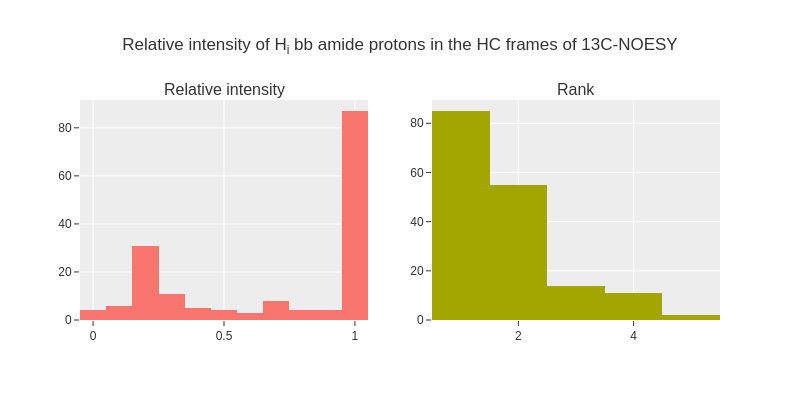

In [6]:
fig = make_subplots(rows=1, cols=2, 
                   subplot_titles=("Relative intensity","Rank"))

fig.add_trace(
    go.Histogram(x=df_C_all.query('atom_type_pos == "H_i"')['rel_height']),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(x=df_C_all.query('atom_type_pos == "H_i"')['rank']),
    row=1, col=2
)

fig.update_layout(height=400, width=800, showlegend=False, 
                  title_text="Relative intensity of H<sub>i</sub> bb amide protons in the HC frames of 13C-NOESY")
fig.show()

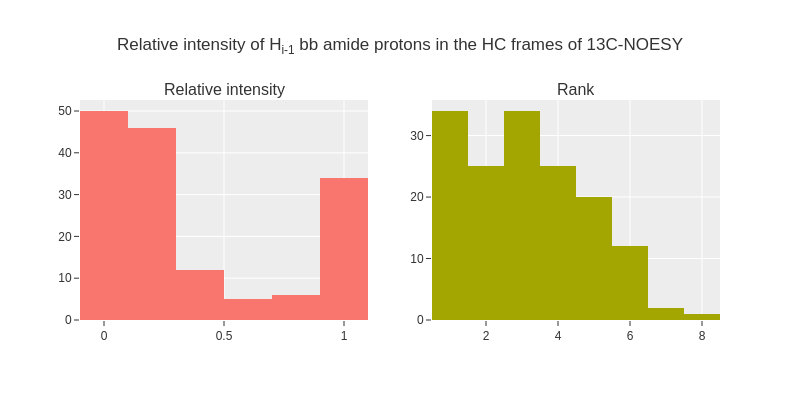

In [7]:
fig = make_subplots(rows=1, cols=2, 
                   subplot_titles=("Relative intensity","Rank"))

fig.add_trace(
    go.Histogram(x=df_C_all.query('atom_type_pos == "H_i-1"')['rel_height']),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(x=df_C_all.query('atom_type_pos == "H_i-1"')['rank']),
    row=1, col=2
)

fig.update_layout(height=400, width=800, showlegend=False, 
                  title_text="Relative intensity of H<sub>i-1</sub> bb amide protons in the HC frames of 13C-NOESY")
fig.show()

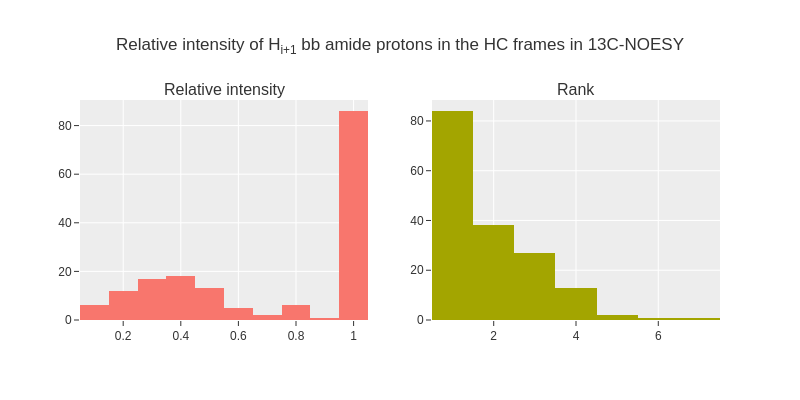

In [8]:
fig = make_subplots(rows=1, cols=2, 
                   subplot_titles=("Relative intensity","Rank"))

fig.add_trace(
    go.Histogram(x=df_C_all.query('atom_type_pos == "H_i+1"')['rel_height']),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(x=df_C_all.query('atom_type_pos == "H_i+1"')['rank']),
    row=1, col=2
)

fig.update_layout(height=400, width=800, showlegend=False, 
                  title_text="Relative intensity of H<sub>i+1</sub> bb amide protons in the HC frames in 13C-NOESY")
fig.show()

In [9]:
df_C_all

,pdb_id,res,noe,X,H,Hnoe,height,rel_height,noe_res,inter,resnum,noe_resnum,res_diff,atom_type,atom_type_pos,rank
14,2JT1,E3CA,S4H,56.802,4.408,8.650,466,1.000000,E3,True,3,4,-1,H,H_i+1,1
37,2JT1,S4CA,H,58.557,4.463,8.650,540,0.198968,S4,False,4,4,0,H,H_i,3
41,2JT1,S4CA,I5H,58.557,4.463,8.404,2714,1.000000,S4,True,4,5,-1,H,H_i+1,1
43,2JT1,S4CA,T7H,58.557,4.463,7.515,547,0.201548,S4,True,4,7,-3,H,H_far,2
55,2JT1,I5CA,H,62.662,3.902,8.404,701,0.776301,I5,False,5,5,0,H,H_i,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4986,2K57,V50CA,T8H,62.302,4.306,8.986,768,1.000000,V50,True,50,8,42,H,H_far,1
5093,2K57,K51CA,V6H,54.703,4.738,9.186,1133,1.000000,K51,True,51,6,45,H,H_far,1
5234,2K57,D52CA,T5H,54.865,4.531,8.235,829,0.923163,D52,True,52,5,47,H,H_far,2
5238,2K57,D52CA,V6H,54.865,4.531,9.186,898,1.000000,D52,True,52,6,46,H,H_far,1


## For Gly frames only

In [10]:
df_C_gly = pd.read_csv('data/out/gly_noe_to_HN_13CALI.csv', index_col=0)
df_C_gly.dropna(inplace=True)
df_C_gly['rank'] = df_N_gly['rank'].astype('int')
df_C_gly['rank'] = df_N_gly['rank'].astype('category')

In [11]:
rank_counts = df_C_gly.groupby(['atom_type_pos', 'rank']).size().unstack(fill_value=0)
rank_counts.insert(3, "4+", rank_counts.iloc[:, 3:].sum(axis=1))
rank_counts = rank_counts.iloc[:, :4]
rank_counts.index.name = "Atom name"
rank_counts.columns = ["1st highest", "2nd highest", "3rd highest", "4th or lower"]

rank_counts.style.background_gradient(cmap='Greens')

,1st highest,2nd highest,3rd highest,4th or lower
Atom name,,,,
H_far,30,21,12,23
H_i,8,6,0,0
H_i+1,8,5,1,0
H_i-1,6,2,3,8


In [12]:
query_atoms=["H_i", "H_i-1", "H_i+1"]

_ = df_N_gly.loc[df_N_gly.atom_type_pos.isin(query_atoms)]
rank_counts = _.groupby(['atom_type_pos', 'rank']).size().unstack(fill_value=0)
rank_counts.insert(3, "4+", rank_counts.iloc[:, 3:].sum(axis=1))
rank_counts = rank_counts.iloc[:, :4]
rank_counts.index.name = "Atom name"
rank_counts.columns = ["1st highest", "2nd highest", "3rd highest", "4th or lower"]

rank_counts.style.background_gradient(cmap='Greens')

,1st highest,2nd highest,3rd highest,4th or lower
Atom name,,,,
H_i,8,6,0,0
H_i+1,8,5,1,0
H_i-1,6,2,3,8


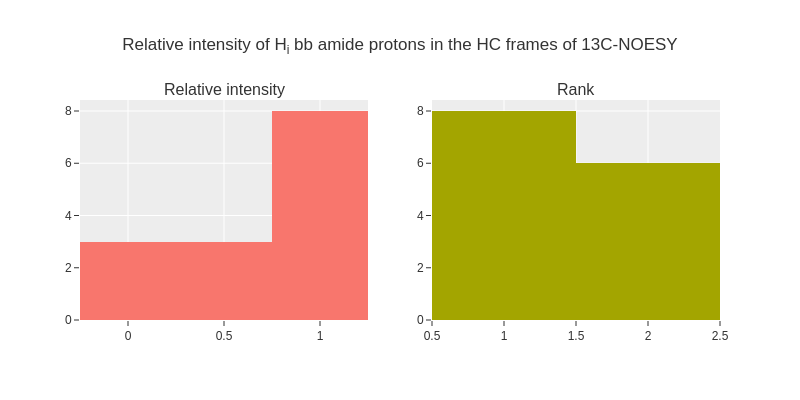

In [13]:
fig = make_subplots(rows=1, cols=2, 
                   subplot_titles=("Relative intensity","Rank"))

fig.add_trace(
    go.Histogram(x=df_N_gly.query('atom_type_pos == "H_i"')['rel_height']),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(x=df_N_gly.query('atom_type_pos == "H_i"')['rank']),
    row=1, col=2
)

fig.update_layout(height=400, width=800, showlegend=False, 
                  title_text="Relative intensity of H<sub>i</sub> bb amide protons in the HC frames of 13C-NOESY")
fig.show()

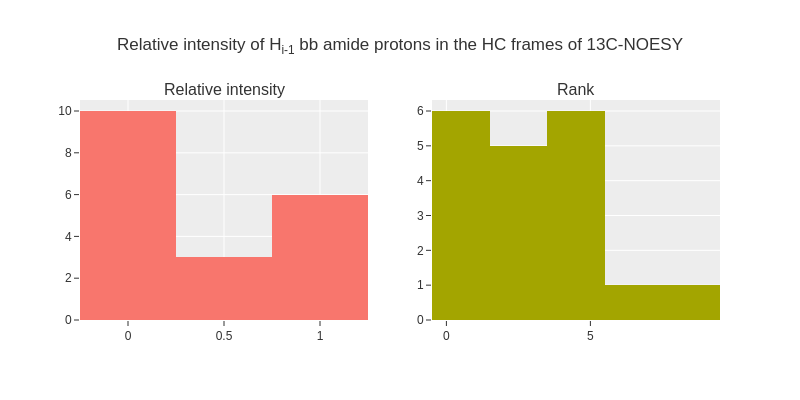

In [14]:
fig = make_subplots(rows=1, cols=2, 
                   subplot_titles=("Relative intensity","Rank"))

fig.add_trace(
    go.Histogram(x=df_N_gly.query('atom_type_pos == "H_i-1"')['rel_height']),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(x=df_N_gly.query('atom_type_pos == "H_i-1"')['rank']),
    row=1, col=2
)

fig.update_layout(height=400, width=800, showlegend=False, 
                  title_text="Relative intensity of H<sub>i-1</sub> bb amide protons in the HC frames of 13C-NOESY")
fig.show()

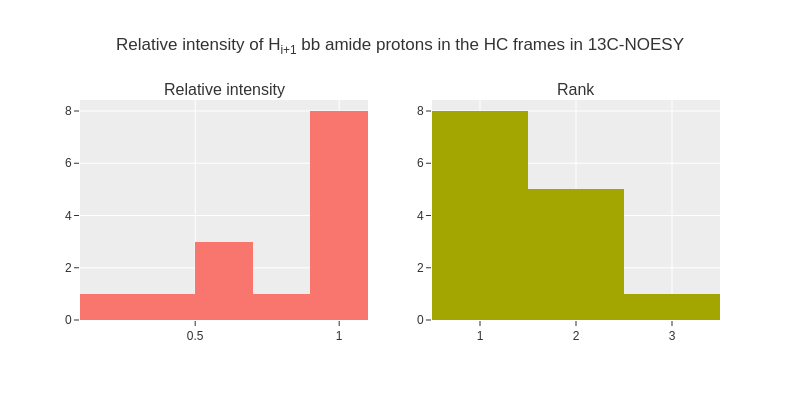

In [15]:
fig = make_subplots(rows=1, cols=2, 
                   subplot_titles=("Relative intensity","Rank"))

fig.add_trace(
    go.Histogram(x=df_N_gly.query('atom_type_pos == "H_i+1"')['rel_height']),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(x=df_N_gly.query('atom_type_pos == "H_i+1"')['rank']),
    row=1, col=2
)

fig.update_layout(height=400, width=800, showlegend=False, 
                  title_text="Relative intensity of H<sub>i+1</sub> bb amide protons in the HC frames in 13C-NOESY")
fig.show()

In [16]:
df_N_gly

,pdb_id,res,noe,X,H,Hnoe,height,rel_height,noe_res,inter,resnum,noe_resnum,res_diff,atom_type,atom_type_pos,rank
1155,2JT1,G22CA,H,45.629,4.189,8.728,3003,1.000000,G22,False,22,22,0,H,H_i,1
1158,2JT1,G22CA,A23H,45.629,4.189,7.473,1617,0.538462,G22,True,22,23,-1,H,H_i+1,2
1883,2JT1,G35CA,A34H,46.388,3.968,8.296,896,0.122572,G35,True,35,34,1,H,H_i-1,3
1885,2JT1,G35CA,H,46.388,3.968,7.911,7310,1.000000,G35,False,35,35,0,H,H_i,1
1888,2JT1,G35CA,L36H,46.388,3.968,7.758,3102,0.424350,G35,True,35,36,-1,H,H_i+1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2556,2K57,G28CA,D24H,46.072,4.068,7.902,76,0.126878,G28,True,28,24,4,H,H_far,3
2558,2K57,G28CA,E25H,46.072,4.068,8.482,39,0.065109,G28,True,28,25,3,H,H_far,4
2560,2K57,G28CA,E26H,46.072,4.068,8.151,161,0.268781,G28,True,28,26,2,H,H_far,2
2569,2K57,G28CA,K44H,46.072,4.068,8.742,599,1.000000,G28,True,28,44,-16,H,H_far,1
